In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['adult.csv']


**Подключите необходимые библиотеки.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau


**Загрузите данные. Они находятся в директории input.**

In [3]:
df = pd.read_csv("../input/adult.csv")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,25,38,28,44,18,34,29,63,24,55
workclass,Private,Private,Local-gov,Private,?,Private,?,Self-emp-not-inc,Private,Private
fnlwgt,226802,89814,336951,160323,103497,198693,227026,104626,369667,104996
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college,10th,HS-grad,Prof-school,Some-college,7th-8th
educational-num,7,9,12,10,10,6,9,15,10,4
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married,Never-married,Never-married,Married-civ-spouse,Never-married,Married-civ-spouse
occupation,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,?,Other-service,?,Prof-specialty,Other-service,Craft-repair
relationship,Own-child,Husband,Husband,Husband,Own-child,Not-in-family,Unmarried,Husband,Unmarried,Husband
race,Black,White,White,Black,White,White,Black,White,White,White
gender,Male,Male,Male,Male,Female,Male,Male,Male,Female,Male


**Визуализируйте распределение значений возраста для лиц, зарабатывающих > 50K и < 50K. Найдите среднее и стандартное отклонение возраста в каждой из групп.**

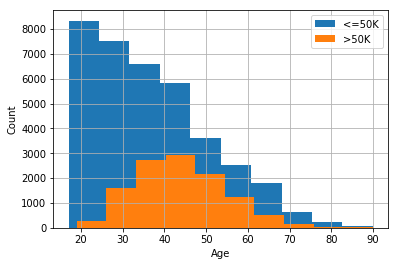

44.275177547702576
36.87218409366169
10.558983370287825
14.104118026101577


In [4]:
df.groupby('income')['age'].hist()
plt.ylabel('Count')
plt.xlabel('Age')
plt.legend(np.array(["<=50K", ">50K"]))
plt.show()
print(df[df["income"] ==">50K"]["age"].mean()) # среднее отклонение возраста для лиц зарабатывающих более 50К
print(df[df["income"] =="<=50K"]["age"].mean()) # среднее отклонение возраста для лиц зарабатывающих менее 50К
print(df[df["income"] ==">50K"]["age"].std()) # среднеквадратичное (стандартное) отклонение возраста для лиц зарабатывающих более 50К
print(df[df["income"] =="<=50K"]["age"].std()) # среднеквадратичное (стандартное) отклонение возраста для лиц зарабатывающих менее 50К

**Верно ли, что люди, зарабатывающие > 50K имеют как минимум полное среднее образование (значения education--- Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)?**

In [5]:
df[df["income"] ==">50K"]["education"].value_counts()

Bachelors       3313
HS-grad         2503
Some-college    2063
Masters         1459
Prof-school      617
Assoc-voc        522
Doctorate        431
Assoc-acdm       413
11th              92
10th              87
7th-8th           62
12th              48
9th               41
5th-6th           27
1st-4th            8
Preschool          1
Name: education, dtype: int64

*Вывод:*
 Не все люди, зарабатывающие больше 50К, имеют полное среднее образование.

**Какие мужчины зарабаывают в среднем больше --- женатые или холостые?**

In [6]:
print(df["relationship"].value_counts())
print(df[(df["relationship"] == "Husband") ]["income"].value_counts(normalize = True) * 100)
print(df[(df["relationship"] == "Unmarried") & (df["gender"] == "Male")]["income"].value_counts(normalize = True) * 100)


Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64
<=50K    55.132887
>50K     44.867113
Name: income, dtype: float64
<=50K    87.719298
>50K     12.280702
Name: income, dtype: float64


*Вывод:* В среднем женатые мужчины зарабатывают больше.

**Каково максимальное количество рабочих часов в неделю? Сколько людей работают такое количество времени и каков среди них процент тех, кто зарабатывает много?**

In [7]:
print(df["hours-per-week"].max()) #максимальное количество рабочих часов в неделю
print(df[df["hours-per-week"] == 99].shape[0]) #cколько человек работает  максимальное количество часов в неделю
print(df[df["hours-per-week"] == 99]["income"].value_counts(normalize = True) * 100)

99
137
<=50K    70.072993
>50K     29.927007
Name: income, dtype: float64


*Вывод:* Не всегда высокий заработок зависит от количества рабочих часов в неделю.

**Что можно сказать о корреляции между количеством рабочих часов и зарплатой? Является ли она статистически значимой?**

In [8]:
df["income>50k"] = df["income"].map({"<=50K":0,">50K":1})
r = pearsonr(df['hours-per-week'], df['income>50k'])
print('Pearson correlation:', r[0], 'p-value:', r[1])
r = spearmanr(df['hours-per-week'], df['income>50k'])
print('Spearman correlation:', r[0], 'p-value:', r[1])
r = kendalltau(df['hours-per-week'], df['income>50k'])
print('Kendalltau correlation:', r[0], 'p-value:', r[1])



Pearson correlation: 0.22768676056081114 p-value: 0.0
Spearman correlation: 0.2681657658301571 p-value: 0.0
Kendalltau correlation: 0.23742944661375098 p-value: 0.0


*Вывод:* т.к. p-value достаточно мала, значит корреляция является статистически значимой. 

**Как связан уровень образования и количество рабочих часов? Не забывайте о визуализации информации.**

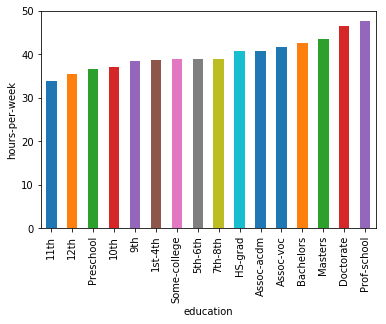

In [9]:
df.groupby("education")["hours-per-week"].mean().sort_values().plot.bar()
plt.ylabel('hours-per-week') 
plt.show()



*Вывод:* Люди с законченным средним и особенно с высшим образованием работают больше часов в неделю. 

**Визуализируйте распределение заработков (группы > 50K и < 50K) по странам. Какой вывод можно сделать?**

89.74243478973015 %


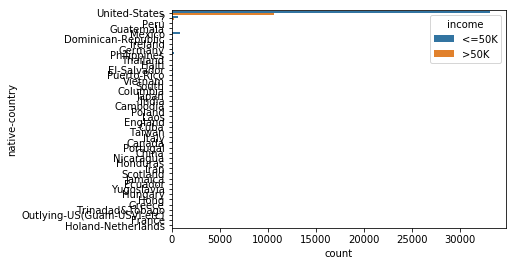

In [10]:
print(df[df["native-country"] == "United-States"].shape[0] / df.shape[0] * 100, "%")
sns.countplot(y = "native-country", hue = "income", data = df)
plt.show()


*Вывод:* Имеющиеся данные больше не сбалансированны. Б о́льшая часть людей из США

**Какие ещё инсайты можно найти в имеющихся данных? Творческое задание.**

Посмотрим на средний заработок по роду деятельности:

<function matplotlib.pyplot.show(*args, **kw)>

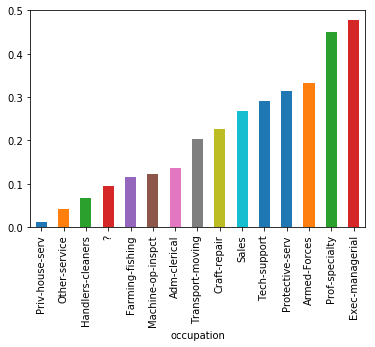

In [11]:
df.groupby('occupation')['income>50k'].mean().sort_values().plot.bar()
plt.show

Посмотрим на заработок по рабочему классу

AxesSubplot(0.125,0.125;0.775x0.755)


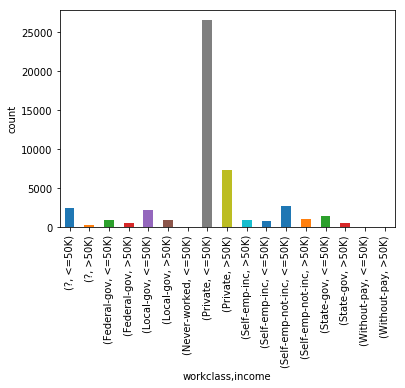

In [12]:
print(df.groupby("workclass")["income"].value_counts().plot(kind = "bar"))
plt.ylabel('count') 
plt.show()
